In [118]:
%matplotlib inline

In [119]:
import tensorflow as tf
import zipfile
import os
import pandas as pd
import numpy as np
import pathlib
import datetime
from collections import Counter
import copy
import matplotlib.pyplot as plt
import time

# Helpful Functions

In [120]:
def cleanURL(url):
    p = pathlib.Path(url)
    path = str(p.as_posix()) 
    return path 


def getDF(loc, sheetname):
    dataframe = pd.read_excel(loc, sheetname)
    #https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe
    dataframe = dataframe.applymap(lambda x: x.strip() if type(x) is str else x)
    return dataframe

def printNulls(df):
    null_columns = df.columns[df.isnull().any()]
    return df[null_columns].isnull().sum() 


def writeDFToFile(dfs, path_): #dfs is an array of dataframes and their sheet names , path needs to have
    time_ = str(datetime.datetime.now())
    current_date_time = time_[0:time_.index(".")]
    current_date_time = current_date_time.replace(":", "-")
    task4_fileoutput = path_+current_date_time+".xlsx"

    writer = pd.ExcelWriter(task4_fileoutput)
    
    for df_tuple in dfs:  
        df = df_tuple[0]
        sheetName = df_tuple[1]
        df.to_excel(writer, sheetName)
    print("file written to :       " + task4_fileoutput)
    writer.save()
    
def plotImg(img):
    if(type(img) ==type(None)):
        img =outputsDataReal[10000]
    arr = []
    for a in img:
        arr = [a] + arr
    plt.pcolor( arr, cmap = 'gist_ncar' )

    plt.show()    

cwd = os.getcwd()
cwd

'/home/muhammadayub/Desktop/CS230/Notebooks/re'

# Load Data

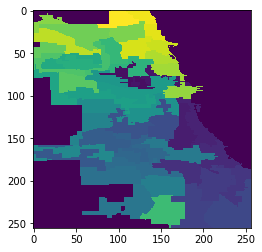

In [6]:

beatAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/beats.npy'))
wardAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/wards.npy'))
# print(np.sum(wardAreaMask, axis = 0).shape)
# plt.imshow(beatAreaMask)
# plt.show()
# plt.imshow(districtAreaMask)
# plt.show()
plt.imshow(wardAreaMask)
plt.show()
# beatAreaMaskT = beatAreaMask.T

### Using the data loader methodology:

In [4]:
################
# Constants 
################
iHeight = 256
iWidth = 256


################
# Load all the data , for the larger data values , just run  
################

# load all the data #CHANGEME
# datesb = np.load(cleanURL(r'C:\Users\User\Documents\CS230 Project\new_github\data_for_cnn_training\dates_data_b.npy'))
# dates = np.load(cleanURL(r'C:\Users\User\Documents\CS230 Project\new_github\data_for_cnn_training\dates_data.npy'))
# buildings = np.load(cleanURL(r'C:\Users\User\Documents\CS230 Project\new_github\data_for_cnn_training\x__buildings_b.npy'))
datesb = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/dates_data_b.npy'))
# dates = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/dates_data.npy'))
buildings = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/x__buildings_b.npy'))

beatAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/beats.npy'))
wardAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/wards.npy'))


#make sure there are no nan values in buildings 
mask = np.isnan(buildings)
indices = np.where(mask ==True)
z = indices[0]
y = indices[1]
x = indices[2]
buildings[z,y,x] = -1


businesses = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/x__businesses_b.npy'))
socio = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/x__socio_b.npy'))
#lentries = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/x__Lentries_c.npy'))#, mmap_mode  = 'r')#CHANGEME
waterway = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/waterway.npy'))
##KLUDGE: This is a quick fix, just set a lot of the data to 0
# waterway[:,170:]= 1

#get all the masks used

################
# Preprocess every image value to be its transpose
################
# buildings  buildingsT -> buildingsTStacked
# businesses    businessesT -> businessesTStacked
# socio   socioT -> socioTStacked
buildingsT= buildings.T
businessesT= businesses.T
socioT = socio.T

datesb= datesb.astype(np.float32)
businessesT = businessesT.astype(np.float32)
buildingsT = buildingsT.astype(np.float32)
socioT = socioT.astype(np.float32)
waterwayT = waterway.T
datesb = datesb.reshape((len(datesb), 1, 1, 4)) #for faster look ups

beatAreaMaskT = beatAreaMask.T
beatAreaMaskT = beatAreaMaskT.reshape(256,256,1)
beatAreaMaskT = beatAreaMaskT.astype(np.float32)


wardAreaMaskT = wardAreaMask.T
wardAreaMaskT = wardAreaMaskT.reshape(256,256,1)
wardAreaMaskT = wardAreaMaskT.astype(np.float32)

print('done0')

done0


In [5]:
# xy = np.full((256,256,4), 1, dtype = np.float32)
# dateLayers = xy* datesb
# dateLayers.shape

In [6]:
#all the outputs
outputsData =[]
for i_ in range(1, 53): # /home/muhammadayub/Desktop/CS230/training_data/outputs/y__c2_127.npy
    y_ = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/outputs/y__c'+str(i_)+'_127.npy'))#, mmap_mode  = 'r')
    outputsData.append(y_)

In [7]:
# if at all possible  #CHANGEME
outputsDataReal = np.concatenate(outputsData, axis = 0)
print(outputsDataReal.shape)
for i_ in range(len(outputsData)):
    outputsData[i_] =None
    
# if at all possible  #CHANGEME
for i_ in range(len(outputsDataReal)):
    outputsDataReal[i_] =outputsDataReal[i_].T    # outputs are transposed once 
print('run once')
# print(outputsDataReal.max())#33 is max, 0 is min
# print(outputsDataReal.min())

(155928, 256, 256)
run once


Remove the non negative data (to balance out the classes sum what)

In [8]:
notNeg1 = np.where(outputsDataReal!= -1)

In [9]:
indices = np.array(list(set(notNeg1[0]))) #get all of the indices needed
print(indices.shape)
notNeg1=None 

(74837,)


In [10]:
sortedIndices = np.sort(indices)
miniBatchIndices = sortedIndices[:74800]  #the cutoff of the data 

In [11]:
#the indices are the ones we want from the outputsDataReal and from datesB
print(outputsDataReal.shape)
print(datesb.shape)
#shrink the arrays 
outputsDataReal = outputsDataReal[miniBatchIndices]
datesb = datesb[miniBatchIndices]
#reprint the sizes 
print(outputsDataReal.shape)
print(datesb.shape)


(155928, 256, 256)
(155928, 1, 1, 4)
(74800, 256, 256)
(74800, 1, 1, 4)


In [12]:
#sort the array of indices , then create MINIBATCHES 
miniBatchIndices = np.arange(74800)
print(miniBatchIndices.shape)
print(miniBatchIndices)

(74800,)
[    0     1     2 ... 74797 74798 74799]


#### Generate minibatches. Shuffle the minibatches, have a function to return a minibatch of X and Y

In [13]:
TIMES_OF_DAY = 24
MINIBATCH_SIZE = 200
MINIBATCHES_AMT = int(len(miniBatchIndices)/MINIBATCH_SIZE) #or 374 minibatches of 200 each 

print("Amount of minibatches " , MINIBATCHES_AMT)
train_split = int(MINIBATCHES_AMT*.90)
dev_split = int(MINIBATCHES_AMT*.05)
test_split = MINIBATCHES_AMT - train_split - dev_split

print(train_split, dev_split, test_split )

Amount of minibatches  374
336 18 20


In [14]:
minibatches = np.split(miniBatchIndices,MINIBATCHES_AMT)
backup_minibatches = copy.deepcopy(minibatches)

devMiniBatches = minibatches[train_split:train_split+dev_split]
testMiniBatches = minibatches[train_split+dev_split:-1]# remove the last minibatch
minibatches = minibatches[:train_split] #training set  #must be at the end
print(len(devMiniBatches+testMiniBatches+minibatches))
print(len(devMiniBatches), len(testMiniBatches) , len(minibatches))

373
18 19 336


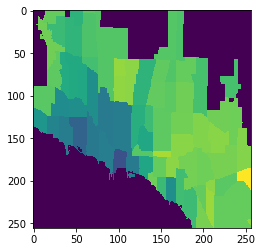

In [91]:
plt.imshow(staticImage[0,:,:,-5])
plt.show()

In [15]:
# datesb -- no need 
# dates -- no need
# buildings  buildingsT -> buildingsTStacked
# businesses    businessesT -> businessesTStacked
# socio   socioT -> socioTStacked
# lentries 
# waterway  -- not part of data 
# outputsData 

def stackManyTimes(_3dimg,times):
    _3dimg_shape = _3dimg.shape
    result = np.zeros(shape=(times, _3dimg_shape[0], _3dimg_shape[1],_3dimg_shape[2] ), dtype=np.float32)
    for x in range(times):
        result[x] = _3dimg
    return result

#next steps -> add lentries, temperature, and masks 
def staticImages():
    #wards
    wardsLayers = stackManyTimes(wardAreaMaskT, MINIBATCH_SIZE)
    
    #beats
    beatsLayers = stackManyTimes(beatAreaMaskT, MINIBATCH_SIZE)
    
    #step 2. Buildings 10 layers 
    buildingLayers = stackManyTimes(buildingsT, MINIBATCH_SIZE)  # buildingsT should be (256,256,10) and result should (150, 256, 256, 10)
  
    #step 3. 
    businessesLayers = stackManyTimes(businessesT, MINIBATCH_SIZE)
    
    #step 4. L entries
    #come back to this one   => must be transposed!!!
    LentryLayers = None
    
    #step 5. socio
    socioLayers = stackManyTimes(socioT, MINIBATCH_SIZE)
    
    staticImage = np.concatenate((buildingLayers,businessesLayers,socioLayers,beatsLayers, wardsLayers) , axis = -1)   #  beatsLayers
    return staticImage

staticImage  = staticImages()


# now we write a function that will return to us the correct minibatch , with all the image data generated
def generateMinibatch(minibatchIndices):    #everything must be transposed
    #general steps:
    #get the x inputs
    #    same as the file of text 
    
    #step 1. dates (make 12 layers of month, day, year , timeOfDay)  # dateLayers don't need to be transposed -> just 1 value
    dateLayers = generateDatesLayers2(minibatchIndices, datesb) # (150, 256, 256, 4)  => len(minibatchIndices) = 150
    
    #step 6. temperature #should be format of
    #pass on this for now -> will add this for later iterations
    
    #step 7. concat everything
    inputImage = np.concatenate((dateLayers,staticImage) , axis = -1)
#     print(np.where((inputImage[:4]==dateLayers)==False))
#     print(np.where((inputImage[4:14]==buildingLayers)==False))

    #step 7. outputs
    output_image = outputsDataReal[minibatchIndices]  # calculateOutput(minibatchIndices)
    return inputImage, output_image#, waterway


xy_ = np.full((256,256,4), 1, dtype = np.float32)
def generateDatesLayers2(minibatchIndices, datesb):
    dateLayers = datesb[minibatchIndices] # (len(minibatchIndices) , 4)
    return xy_* dateLayers 

# def generateDatesLayers(minibatchIndices, datesb):
#     base_img_mask = np.ones((256, 256), dtype=np.float32)
#     xy = np.dstack([base_img_mask]*4) # shape (256, 256, 4)
#     dateLayers = datesb[minibatchIndices] # (len(minibatchIndices) , 4)
#     dateLayersReshaped = dateLayers.reshape((len(dateLayers), 1,1,dateLayers.shape[1])) # (len(minibatchIndices),1,1 , 4)
#     xyz = xy* dateLayersReshaped 
#     return xyz

def transpose3dImage(img):
    img_T = img.T #tested this actually does what we wante it to do.  
    return img_T


def calculateOutput(sample):
    batchMin = min(sample)#67050
    batchMax = max(sample)#67199
    #     batchMax  = 69050
    #print("batch min " , batchMin," batch max ", batchMax )
    remMin = batchMin % BATCHSIZE_Y
    multipleMin = int(batchMin / BATCHSIZE_Y)

    remMax = batchMax % BATCHSIZE_Y
    multipleMax = int(batchMax / BATCHSIZE_Y)
    
    batch = None
    if(multipleMin != multipleMax):# have to concatenate  batch size can never be more than 3000#
        print('here')
        batch = np.concatenate((outputsData[multipleMin],outputsData[multipleMax]), axis = 0)
    else:
        print('not here')
        batch = outputsData[multipleMin]

    offset = multipleMin*BATCHSIZE_Y
    sample_ = np.array(sample)-offset
    data_output = batch[sample_]
    return data_output

# inputImage64 =  split256by256StackOnAxis(inputImage)
def split256by256StackOnAxis(inputImg):  #returns the images in (64 , 64, numberOfChannels)
    imagesList = np.split(inputImg, 4, axis = 1)
    images64by64 = []

    for almostImage in imagesList:
        imagesList64by64 = np.split(almostImage, 4, axis = 2) # axis is 0, 1, 2
        for actual64by64 in imagesList64by64:
            images64by64.append(actual64by64)
    #     for i,_64 in enumerate(images64by64):
    #         print(i, _64.shape)
    return np.concatenate(images64by64, axis = 0)

def getOutputYVector(y_output_image64, numCats): # y_output_image64 is of shape (3200,64,64)  , 34 categories + -1
    result = np.zeros((len(y_output_image64), numCats), dtype=np.float32)
    cCount = None 
    for i_, img in enumerate(y_output_image64):
        cCount = Counter(img.flatten())
        if(len(np.unique(img)) == 1): #if all -1's
            result[i_][0] = 1
        else: # get the second most common thing (since -1 are going to be the most common)
            result[i_][int(cCount.most_common()[1][0])+1] = 1 # get the second value (index of 1) of most common array
    return result

    #get the argmax for now  -1 goes to 0, 0 goes to 1, etc. until you have 33 going to 34   -> kludge need to set this to -1
    #result[i_][int(cCount.most_common()[0][0])+1] = 1

def transformTo64(inputImage, output_image, numCats):
    inputImage64 =  split256by256StackOnAxis(inputImage)
    output_image64 = split256by256StackOnAxis(output_image)
    output_image64 = getOutputYVector(output_image64, numCats) #34 categories since we use -1s, but then shave them off
    return inputImage64, output_image64

def generateWaterWayMask(waterwayT, threshold):# between 0 and 4096, need atmost 200 to be water 
    waterwayMask = np.zeros((MINIBATCH_SIZE, 256,256), dtype=np.float32)
    for i_ in range(len(waterwayMask)):
        waterwayMask[i_] = waterwayT
        
    #now that we have the ( 200, 256,256)  (sizeOfOneMiniBatch is 200 for example)
    #we can break it up into the 64 by 64 images
    waterwayMask64 = split256by256StackOnAxis(waterwayMask)
    #from here, you count up each one of the 64 by 64 images and set to the threshold
    waterwayMaskIndices = [] # include if they are one 
    for i_ in range(len(waterwayMask64)):
        if(np.sum(waterwayMask64[i_]) <= threshold): #> would mean you have more 1's than allowed -> not tolerable 
            waterwayMaskIndices.append(i_)
    return waterwayMaskIndices

print('done')

done


200

#### Generate minibatches. Shuffle the minibatches, have a function to return a minibatch of X and Y

In [20]:
WaterWayMask = generateWaterWayMask(waterwayT, 400)

a_ = time.time()
for x_ in range(1):
    minibatch = minibatches[x_]
    a,b = generateMinibatch(minibatch)
    inputImage64, output_image64 = transformTo64(a, b,35)
    c = output_image64[WaterWayMask]
    d = inputImage64[WaterWayMask]
b_ = time.time()

# ran 88 seconds for 20 times  - with generating waterway mask each time
# ran 175.67435598373413  seconds for 40 times  - with generating waterway mask each time - 4.39 seconds per load 
# ran 164.55799078941345   seconds for 40 times  - without generating waterway mask each time 
# ran 173.7626793384552 seconds for 40 times  - with adding beats layer 

(200, 256, 256, 28)
(3200, 64, 64, 28)


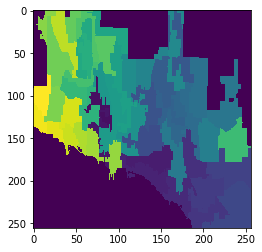

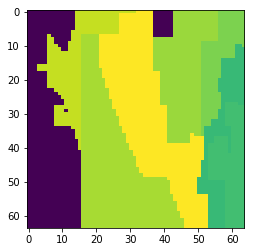

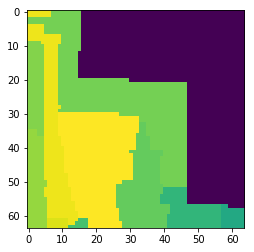

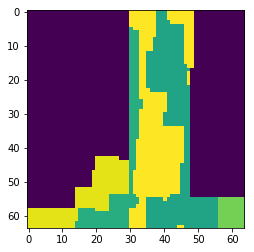

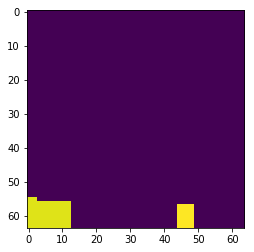

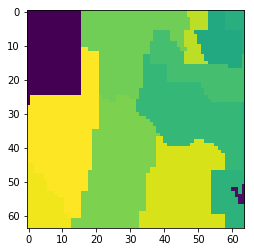

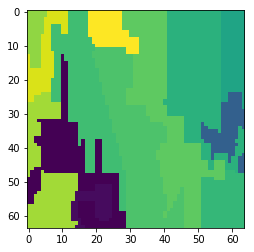

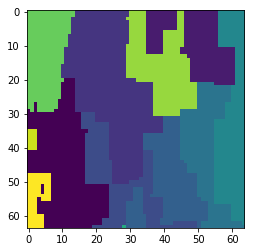

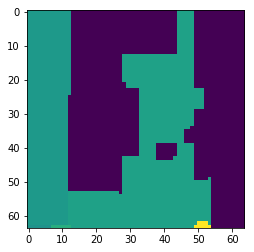

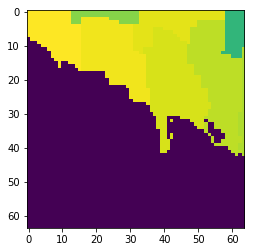

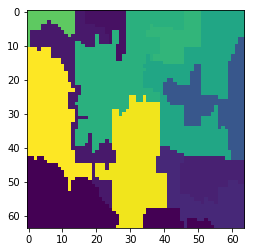

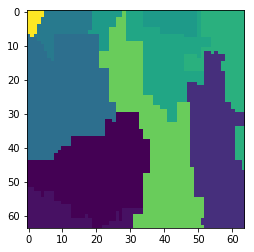

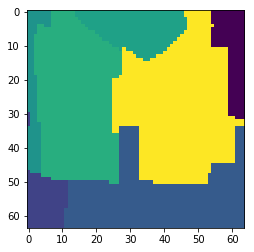

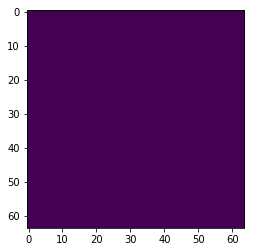

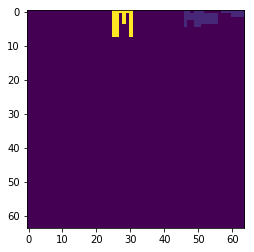

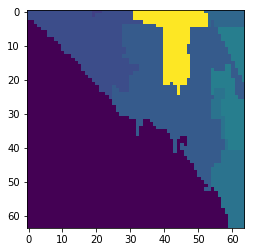

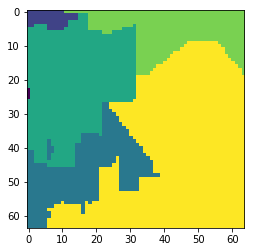

In [25]:
print(a.shape)
abc = split256by256StackOnAxis(a)
print(abc.shape)
plt.imshow(a[0,:,:,27])
plt.show()

for x_ in range(16):
    plt.imshow(abc[x_*200,:,:,27])
    plt.show()



Writing the 700 gb of data to disk


# Generate the Raw Data for the Neural Network 

In [86]:
base_filepath = "/home/muhammadayub/Desktop/CS230/training_data/minibatches/"
def getOutputMaskFilter(output_image64): # output_image64 is of shape (m, 64, 64)
    outputMaskIndices = []
    for i_, img in enumerate(output_image64):
        if(len(np.unique(img)) != 1): #if not all -1's
            outputMaskIndices.append(i_)
    return outputMaskIndices


# len(backup_minibatches)
WaterWayMask = generateWaterWayMask(waterwayT, int(4097))

a_ = time.time()
for i_,minibatch in enumerate(backup_minibatches):

    a,b = generateMinibatch(minibatch) #returns input and output 
    inputImage64 =  split256by256StackOnAxis(a)
    output_image64 = split256by256StackOnAxis(b)
    
    inputC = inputImage64[WaterWayMask]
    outputD = output_image64[WaterWayMask]
    
    
    outputsMaskFilter = getOutputMaskFilter(outputD)# have 34 categories 
    
    inputC=inputC[outputsMaskFilter]
    outputD=outputD[outputsMaskFilter]
    
    
    #write c and d to file
    inputPath = base_filepath+'input_'+str(i_)+"_.npy"
    outputPath = base_filepath+'output_'+str(i_)+"_.npy"
    
    np.save(inputPath, inputC)
    np.save(outputPath, outputD)
    
    print("Done minibatch ", i_ , str(datetime.datetime.now()))
    
b_ = time.time()
print(b_ - a_)

Done minibatch  0 2018-12-10 11:31:57.655799
Done minibatch  1 2018-12-10 11:32:00.183506
Done minibatch  2 2018-12-10 11:32:02.723589
Done minibatch  3 2018-12-10 11:32:05.249872
Done minibatch  4 2018-12-10 11:32:07.788001
Done minibatch  5 2018-12-10 11:32:10.316357
Done minibatch  6 2018-12-10 11:32:12.855975
Done minibatch  7 2018-12-10 11:32:15.401830
Done minibatch  8 2018-12-10 11:32:17.939754
Done minibatch  9 2018-12-10 11:32:20.573912
Done minibatch  10 2018-12-10 11:32:23.117990
Done minibatch  11 2018-12-10 11:32:25.761531
Done minibatch  12 2018-12-10 11:32:28.298648
Done minibatch  13 2018-12-10 11:32:30.955574
Done minibatch  14 2018-12-10 11:32:33.492818
Done minibatch  15 2018-12-10 11:32:36.031017
Done minibatch  16 2018-12-10 11:32:38.575698
Done minibatch  17 2018-12-10 11:32:41.192829
Done minibatch  18 2018-12-10 11:32:43.733721
Done minibatch  19 2018-12-10 11:32:46.370113
Done minibatch  20 2018-12-10 11:32:48.949085
Done minibatch  21 2018-12-10 11:32:51.59798

Done minibatch  177 2018-12-10 11:39:13.435269
Done minibatch  178 2018-12-10 11:39:15.979237
Done minibatch  179 2018-12-10 11:39:18.511585
Done minibatch  180 2018-12-10 11:39:21.036525
Done minibatch  181 2018-12-10 11:39:23.556538
Done minibatch  182 2018-12-10 11:39:26.077961
Done minibatch  183 2018-12-10 11:39:28.596082
Done minibatch  184 2018-12-10 11:39:31.129538
Done minibatch  185 2018-12-10 11:39:33.694018
Done minibatch  186 2018-12-10 11:39:36.220342
Done minibatch  187 2018-12-10 11:39:38.888429
Done minibatch  188 2018-12-10 11:39:41.408388
Done minibatch  189 2018-12-10 11:39:43.969226
Done minibatch  190 2018-12-10 11:39:46.496515
Done minibatch  191 2018-12-10 11:39:49.042597
Done minibatch  192 2018-12-10 11:39:51.582071
Done minibatch  193 2018-12-10 11:39:54.128685
Done minibatch  194 2018-12-10 11:39:56.663635
Done minibatch  195 2018-12-10 11:39:59.225035
Done minibatch  196 2018-12-10 11:40:01.783990
Done minibatch  197 2018-12-10 11:40:04.340192
Done minibatc

Done minibatch  352 2018-12-10 11:46:23.262027
Done minibatch  353 2018-12-10 11:46:25.653197
Done minibatch  354 2018-12-10 11:46:28.024031
Done minibatch  355 2018-12-10 11:46:30.412932
Done minibatch  356 2018-12-10 11:46:32.800344
Done minibatch  357 2018-12-10 11:46:35.194933
Done minibatch  358 2018-12-10 11:46:37.579517
Done minibatch  359 2018-12-10 11:46:39.978364
Done minibatch  360 2018-12-10 11:46:42.364012
Done minibatch  361 2018-12-10 11:46:44.774298
Done minibatch  362 2018-12-10 11:46:47.181270
Done minibatch  363 2018-12-10 11:46:49.570088
Done minibatch  364 2018-12-10 11:46:51.975666
Done minibatch  365 2018-12-10 11:46:54.373292
Done minibatch  366 2018-12-10 11:46:56.771974
Done minibatch  367 2018-12-10 11:46:59.172480
Done minibatch  368 2018-12-10 11:47:01.544063
Done minibatch  369 2018-12-10 11:47:03.923965
Done minibatch  370 2018-12-10 11:47:06.303912
Done minibatch  371 2018-12-10 11:47:08.703984
Done minibatch  372 2018-12-10 11:47:11.093201
Done minibatc

In [59]:
a,b = generateMinibatch(minibatch) #returns input and output 
inputImage64 =  split256by256StackOnAxis(a)
output_image64 = split256by256StackOnAxis(b)

inputC = inputImage64[WaterWayMask]
outputD = output_image64[WaterWayMask]


outputsMaskFilter = getOutputMaskFilter(outputD)# have 34 categories 

inputC=inputC[outputsMaskFilter]
outputD=outputD[outputsMaskFilter]

In [88]:
# WaterWayMask = generateWaterWayMask(waterwayT, int(64*64*.99))
len(WaterWayMask)
# int(64*64*.99)

3200

In [85]:
count_ = 0
waterwayMask = np.zeros((MINIBATCH_SIZE, 256,256), dtype=np.float32)
for i_ in range(len(waterwayMask)):
    waterwayMask[i_] = waterwayT

#now that we have the ( 200, 256,256)  (sizeOfOneMiniBatch is 200 for example)
#we can break it up into the 64 by 64 images
waterwayMask64 = split256by256StackOnAxis(waterwayMask)
#from here, you count up each one of the 64 by 64 images and set to the threshold
waterwayMaskIndices = [] # include if they are one 
for i_ in range(len(waterwayMask64)):
    if(np.sum(waterwayMask64[i_]) <= 4055): #> would mean you have more 1's than allowed -> not tolerable 
        waterwayMaskIndices.append(i_)
    else:
#         print(i_)
        pass

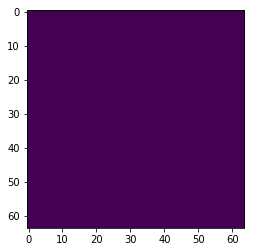

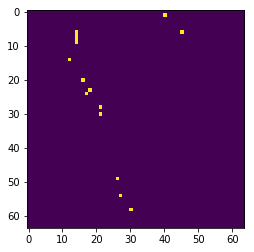

{0.0, 1.0}


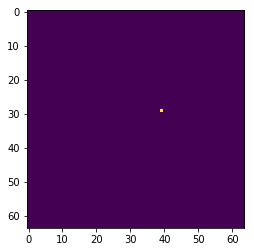

{0.0, 1.0}


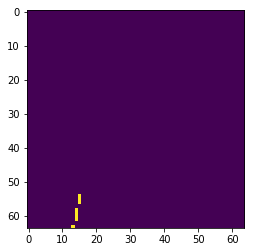

{0.0, 1.0}


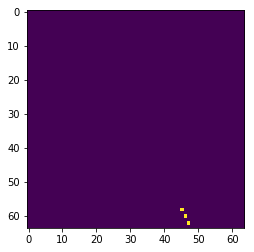

{0.0, 1.0}


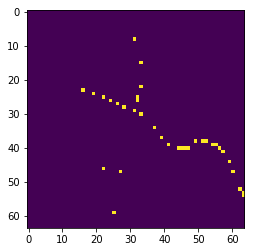

{0.0, 1.0}


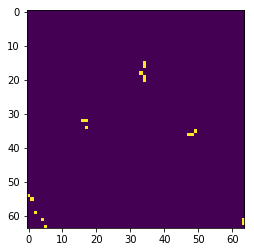

{0.0, 1.0}


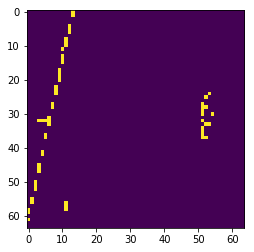

{0.0, 1.0}


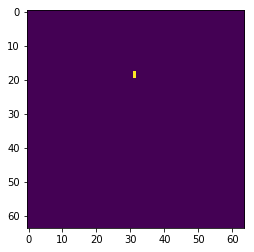

{0.0, 1.0}


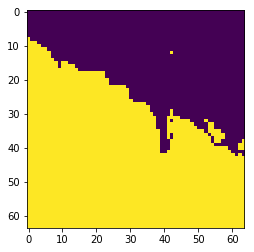

{0.0, 1.0}


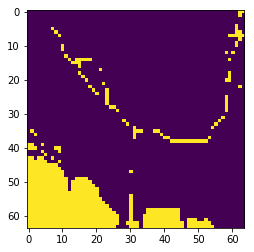

{0.0, 1.0}


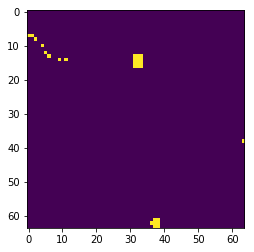

{0.0, 1.0}


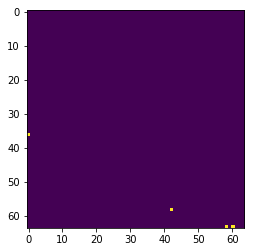

{0.0, 1.0}


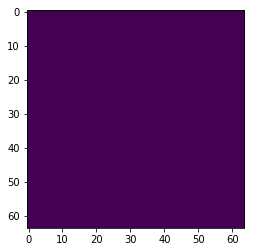

{1.0}


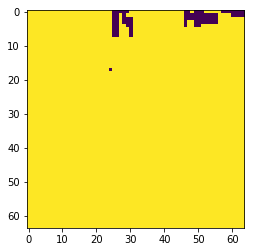

{0.0, 1.0}


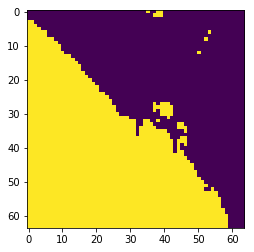

{0.0, 1.0}


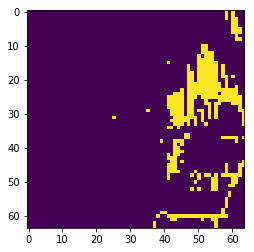

{0.0, 1.0}


In [84]:
plt.imshow(waterwayMask64[2414])
plt.show()

imagesList = np.split(waterwayT, 4, axis = 0)
images64by64 = []
for almostImage in imagesList:
    imagesList64by64 = np.split(almostImage, 4, axis = 1) # axis is 0, 1, 2
    for actual64by64 in imagesList64by64:
        images64by64.append(actual64by64)

for x_ in range(len(images64by64)):
    plt.imshow(images64by64[x_])
    plt.show()
    print(set(images64by64[x_].flatten()))

    
    

In [ ]:
def getOutputMaskFilter(output_image64): # output_image64 is of shape (m, 64, 64)
    outputMaskIndices = []
    for i_, img in enumerate(output_image64):
        if(len(np.unique(img)) != 1): #if not all -1's
            outputMaskIndices.append(i_)
    return outputMaskIndices

In [66]:
outputD.shape
outputMaskIndices = []
for i_, img in enumerate(output_image64):
    if(len(np.unique(img)) != 1): #if not all -1's
        outputMaskIndices.append(i_)

(2800, 64, 64)

In [68]:
abc = np.where(outputD != -1)
abc[0]

array([], dtype=int64)

In [113]:


base_filepath = "/home/muhammadayub/Desktop/CS230/training_data/minibatches/"
inputArrs=[]
outputArrs = []

for i_ in range(374):
    inputPath = base_filepath+'input_'+str(i_)+"_.npy"
    outputPath = base_filepath+'output_'+str(i_)+"_.npy"

    inputVal = np.load(inputPath, mmap_mode='r')
    outputVal = np.load(outputPath, mmap_mode='r')

    
    if(outputVal.shape[0]!= 0): # if it is not empty 
        for j_, img in enumerate(outputVal):
            inputArrs.append(inputVal[j_])
            outputArrs.append(outputVal[j_])

    

In [114]:
print(len(inputArrs))
print(len(outputArrs))
inputArrs= inputArrs[:74800]
outputArrs=outputArrs[:74800]
print(len(inputArrs))
print(len(outputArrs))

74907
74907
74800
74800


In [115]:
for i_ in range(74800):
    outputArrs[i_] = outputArrs[i_].reshape(1,64,64)
    inputArrs[i_]= inputArrs[i_].reshape(1,64,64, 28)

In [117]:
outputArrs = np.concatenate(outputArrs, axis = 0)
inputArrs = np.concatenate(inputArrs, axis = 0)

In [124]:
print(inputArrs.shape)
print(outputArrs.shape)

(74800, 64, 64, 28)
(74800, 64, 64)


In [125]:
#break up to the minibatches 
MINIBATCH_AMT = 74800/200
dataIndices = np.arange(74800)
# inputArrs = np.split(inputArrs,MINIBATCH_AMT)
# outputArrs = np.split(outputArrs,MINIBATCH_AMT)
minibatchesForDownload = np.split(dataIndices, MINIBATCH_AMT)
# minibatchesForDownload[1]

In [126]:
base_filepath = "/home/muhammadayub/Desktop/CS230/training_data/minibatches_real/"

for i_, minibatch in enumerate(minibatchesForDownload):
    inputArr = inputArrs[minibatch]
    outputArr = outputArrs[minibatch]
    
    inputPath = base_filepath+'input_'+str(i_)+"_.npy"
    outputPath = base_filepath+'output_'+str(i_)+"_.npy"
    
    np.save(inputPath , inputArr )
    np.save(outputPath , outputArr )
    print(i_ , " ", datetime.datetime.now())
    

0   2018-12-10 12:55:03.780237
1   2018-12-10 12:55:03.866674
2   2018-12-10 12:55:03.949258
3   2018-12-10 12:55:04.031891
4   2018-12-10 12:55:04.112929
5   2018-12-10 12:55:04.193634
6   2018-12-10 12:55:04.275217
7   2018-12-10 12:55:04.355656
8   2018-12-10 12:55:04.435775
9   2018-12-10 12:55:04.516683
10   2018-12-10 12:55:04.596760
11   2018-12-10 12:55:04.676832
12   2018-12-10 12:55:04.759026
13   2018-12-10 12:55:04.850487
14   2018-12-10 12:55:04.935418
15   2018-12-10 12:55:05.023300
16   2018-12-10 12:55:05.110595
17   2018-12-10 12:55:05.198800
18   2018-12-10 12:55:05.287107
19   2018-12-10 12:55:05.373492
20   2018-12-10 12:55:05.458978
21   2018-12-10 12:55:05.544569
22   2018-12-10 12:55:05.628167
23   2018-12-10 12:55:05.710502
24   2018-12-10 12:55:05.819704
25   2018-12-10 12:55:05.914068
26   2018-12-10 12:55:06.024810
27   2018-12-10 12:55:06.213338
28   2018-12-10 12:55:06.411703
29   2018-12-10 12:55:06.622509
30   2018-12-10 12:55:06.833333
31   2018-12-10 12

252   2018-12-10 12:57:42.417053
253   2018-12-10 12:57:43.180506
254   2018-12-10 12:57:43.869658
255   2018-12-10 12:57:44.584831
256   2018-12-10 12:57:45.411524
257   2018-12-10 12:57:45.977447
258   2018-12-10 12:57:46.719933
259   2018-12-10 12:57:47.531902
260   2018-12-10 12:57:48.207764
261   2018-12-10 12:57:48.847588
262   2018-12-10 12:57:49.437867
263   2018-12-10 12:57:50.108472
264   2018-12-10 12:57:50.728343
265   2018-12-10 12:57:51.340232
266   2018-12-10 12:57:52.096160
267   2018-12-10 12:57:52.847992
268   2018-12-10 12:57:53.479945
269   2018-12-10 12:57:54.145305
270   2018-12-10 12:57:54.769152
271   2018-12-10 12:57:55.633162
272   2018-12-10 12:57:56.112970
273   2018-12-10 12:57:56.809792
274   2018-12-10 12:57:57.501612
275   2018-12-10 12:57:58.236585
276   2018-12-10 12:57:59.052161
277   2018-12-10 12:57:59.729446
278   2018-12-10 12:58:00.458455
279   2018-12-10 12:58:01.201244
280   2018-12-10 12:58:01.827714
281   2018-12-10 12:58:02.629048
282   2018

In [6]:
base_filepath = "/home/muhammadayub/Desktop/CS230/training_data/minibatches_real/"

a_ = time.time()

for i_ in range(374):
    
    inputPath = base_filepath+'input_'+str(i_)+"_.npy"
    outputPath = base_filepath+'output_'+str(i_)+"_.npy"
    
    inputMinibatch = np.load(inputPath, mmap_mode = 'r')
    outputMinibatch = np.load(outputPath, mmap_mode = 'r')

    for img in outputMinibatch:
        cCount = Counter(img.flatten())
#         print(outputMinibatch)
    
b_ = time.time()
    
    
    

#     print(len(np.where(abc != 0)[0]))
    
print(b_-a_)

230.7774260044098


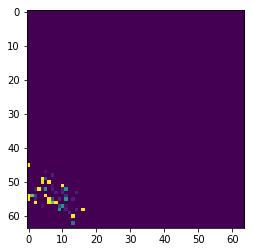

In [141]:
# plt.imshow(abc[-90].astype(np.int64))
# plt.show()

In [11]:
MINIBATCHES_AMT = 374
miniBatchIndices = np.arange(MINIBATCHES_AMT)
train_split = int(MINIBATCHES_AMT*.90)
dev_split = int(MINIBATCHES_AMT*.05)
test_split = MINIBATCHES_AMT - train_split - dev_split
print(train_split, dev_split, test_split )

backup_minibatches = copy.deepcopy(miniBatchIndices)

devMiniBatches = copy.deepcopy(miniBatchIndices[train_split:train_split+dev_split])
testMiniBatches = copy.deepcopy(miniBatchIndices[train_split+dev_split:])# remove the last minibatch
minibatches = copy.deepcopy(miniBatchIndices[:train_split]) #training set  #must be at the end

# print(len(devMiniBatches+testMiniBatches+minibatches))
print(len(devMiniBatches), len(testMiniBatches) , len(minibatches))
print(devMiniBatches)
print(testMiniBatches)
print(minibatches)

336 18 20
18 20 336
[336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353]
[354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371
 372 373]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202

In [12]:
CATEGORY_AMT = 34  # model5/model3_12_9__541_160.ckpt

In [71]:
devMiniBatches = np.load( '/home/muhammadayub/Desktop/CS230/models_saved/model5/devMiniBatches.npy')
testMiniBatches = np.load( '/home/muhammadayub/Desktop/CS230/models_saved/model5/testMiniBatches.npy' )
minibatches = np.load( '/home/muhammadayub/Desktop/CS230/models_saved/model5/minibatches.npy' )

In [72]:
devMiniBatches

array([360, 362, 316,  43, 246, 319, 293, 224,  41,  50, 274,  37,  65,
       266, 241, 311,  79,  18])

In [121]:
base_filepath = "/home/muhammadayub/Desktop/CS230/training_data/minibatches_real/"

a_ = time.time()

inputData = []
outputData = []

for i_ in devMiniBatches:
    
    inputPath = base_filepath+'input_'+str(i_)+"_.npy"
    outputPath = base_filepath+'output_'+str(i_)+"_.npy"
    
    inputMinibatch = np.load(inputPath, mmap_mode = 'r')
    outputMinibatch = np.load(outputPath, mmap_mode = 'r')
    
    oneHotVectors = np.zeros(shape=( len(outputMinibatch), CATEGORY_AMT ))
    
    
    for x_ , img in enumerate(outputMinibatch):
        cCount = Counter(img.flatten())
        mC = cCount.most_common()
        if(mC[0][0] == -1):
            oneHotVectors[x_][int(mC[1][0])] = 1
    
    inputData.append(inputMinibatch)
    outputData.append(oneHotVectors)
    
    
b_ = time.time()
   
print(b_-a_)

23.37549662590027


In [123]:
base_filepath = "/home/muhammadayub/Desktop/CS230/training_data/minibatches_real/"

a_ = time.time()

inputData = []
outputData = []

for i_ in range(374):
    
    inputPath = base_filepath+'input_'+str(i_)+"_.npy"
    outputPath = base_filepath+'output_'+str(i_)+"_.npy"
    
    inputMinibatch = np.load(inputPath, mmap_mode = 'r')
    outputMinibatch = np.load(outputPath, mmap_mode = 'r')
    
    oneHotVectors = np.zeros(shape=( len(outputMinibatch), CATEGORY_AMT ))
    
    
    for x_ , img in enumerate(outputMinibatch):
        cCount = Counter(img.flatten())
        mC = cCount.most_common()
        
        oneHotVectors[x_][0] = 1
        
#         if(len(mC) == 2):
#             if(mC[0][0] == -1):
#                 oneHotVectors[x_][int(mC[1][0])] = 1
#             else:
#                 print("oh no-> assumption doesn't hold true . Recode")
#         elif(len(mC) == 3):
#             if(mC[0][0] == -1):
#                 oneHotVectors[x_][int(mC[1][0])] = .5
#                 oneHotVectors[x_][int(mC[2][0])] = .5
#             else:
#                 print("oh no-> assumption doesn't hold true . Recode")
#         else:#(len(mc) >= 4):
#             if(mC[0][0] == -1):
#                 oneHotVectors[x_][int(mC[1][0])] = .33
#                 oneHotVectors[x_][int(mC[2][0])] = .34
#                 oneHotVectors[x_][int(mC[3][0])] = .33
#             else:
#                 print("oh no-> assumption doesn't hold true . Recode")
        
            
            
    inputData.append(inputMinibatch)
    outputData.append(oneHotVectors)
    
    
b_ = time.time()
   
print(b_-a_)

447.2990291118622


In [124]:
print(len(inputData))
print(len(outputData))


374
374


# Get the model and learn from the data

In [89]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """


    X = tf.placeholder(shape =[None, n_H0, n_W0, n_C0], dtype = np.float32, name="X")
    Y = tf.placeholder(shape  =[None, n_y], dtype = np.float32 , name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [90]:
def initialize_parameters():    

    W1 = tf.get_variable("W1", [10, 10, 28, 3], initializer =tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [6, 6, 3, 2], initializer =tf.contrib.layers.xavier_initializer(seed = 0))
    W3 = tf.get_variable("W3", [35,200] , initializer =tf.contrib.layers.xavier_initializer(seed = 0) )

    parameters = {"W1": W1, "W2": W2 , 'W3': 'W3'}
    
    return parameters

In [91]:
def forward_prop(X, params):
    W1 = params['W1']
    W2 = params['W2']    
    W3 = params['W3']
    
    #convolution 
    Z1 = tf.nn.conv2d(X,W1, strides = [1,2,2,1], padding = 'VALID')
    
    #bias added automatically # RELU
    A1 = tf.nn.relu(Z1)
    
    #average pooling -> at this point all features/weights are important to us
    P1 = tf.nn.avg_pool(A1, ksize = [1,3,3,1], strides = [1,1,1,1], padding = 'SAME')

    # convolution 
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,2,2,1], padding = 'VALID')
    
    #RELU
    A2 = tf.nn.relu(Z2)
    
    #max pooling
    P2 = tf.nn.max_pool(A2, ksize = [1,3,3,1], strides = [1,1,1,1], padding = 'VALID')
    
    #flatten
    P2 = tf.contrib.layers.flatten(P2)

    #fully connected
    Z3 = tf.contrib.layers.fully_connected(P2, CATEGORY_AMT, activation_fn = None) #1 for yes/no
    #going to add the softmax directly

    return Z3

In [78]:
# 22:04 - 22:08 Tuesday
# 22:10 - 22:20
#Restoring the model


In [125]:
filepath = "/home/muhammadayub/Desktop/CS230/models_saved/model5/model3_12_9__541_160.ckpt" #4/model3_12_9__134_100.ckpt" #model4/model3_12_9__9_80.ckpt"
# dev_test_or_train = 1
# if(dev_test_or_train ==1): #train

# filepathEvalMetrics = "/home/muhammadayub/Desktop/CS230/models_saved/model3/model_12_9__"+str(49)+"_"+str(60)+"_evalMetrics_train.npy"
accuracies= []

print(" Running ", len(outputData) , " minibatches to get the evaluation metrics")
output_classes = []
predicted_classes = []

preds_one_hot_ev_value = None
output_one_hot_ev_value =None 


graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:
        
        #define the graph
        X, Y = create_placeholders(64, 64, 28, 34)
        parameters = initialize_parameters()
        Z3 = forward_prop(X, parameters)
        #optimization 
#         cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
#         optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)#1e-4).minimize(cross_entropy)

        #calculating the accuracy of the model 
        softmaxZ3 = tf.nn.softmax(Z3) # size will be 2200, 34
        output_class = tf.argmax(softmaxZ3,1) # size will be 2200, 1 or just (2200,)  # this is the predictions vector
        output_class_of_data =  tf.argmax(Y,1)
        num_correct = tf.equal(output_class, output_class_of_data) # must compare 2200
        num_correct_to_int = tf.cast(num_correct, tf.float32)
        accuracy = tf.reduce_mean(num_correct_to_int)
        
        
        saver = tf.train.Saver()

        saver.restore(sess , filepath)
        print("Model restored.")
        
        #devMiniBatches 
        #testMiniBatches
        for i_  in range(len(outputData)):

            output_image64 = outputData[i_]
            inputImage64 = inputData[i_]
            #temp_cost = sess.run([cost], feed_dict={X: inputImage64, Y: output_image64})
            softmaxZ3Value, predicted_classes_val, output_class_val, accuracy_val = sess.run([softmaxZ3, output_class, output_class_of_data, accuracy], feed_dict={X: inputImage64, Y: output_image64})
            
            #print(outputData[i_][46])#tf.nn.top_k(a, 2) #https://stackoverflow.com/questions/40808772/tensorflow-top-n-values-in-tensor
            accuracies.append(accuracy_val)
            output_classes.append(output_class_val)
            predicted_classes.append(predicted_classes_val)
            
            print('Minibatch: ', str(i_), " ", datetime.datetime.now())
            
            
#new graph for concatenating things and getting into the right format for the F1 score 
graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:            
    
        val1 = tf.concat(output_classes, axis = 0)
        
    
        #after running the minibatches-> we can concatenate the values 
        preds = tf.concat(predicted_classes,axis = 0)
        data_outputs = tf.concat(output_classes,axis = 0)
        
        d = 35 # d is the total number of classes you have 
        #classLabels =  np.array([2,3,5,6,5,4,2,0,0])# the indexes 
        # tf.one_hot(classLabels, d)

        preds_one_hot = tf.one_hot(preds, d)
        data_outputs_one_hot =tf.one_hot(data_outputs, d)#evaluated 
        preds_one_hot_ev, output_one_hot_ev = sess.run([preds_one_hot, data_outputs_one_hot])
        
        preds_one_hot_ev_value =preds_one_hot_ev
        output_one_hot_ev_value =output_one_hot_ev
        
#For Debugging below:
#         zVal = sess.run([Z3], feed_dict={X: inputImage64, Y: output_image64})
#         softMaxVal = sess.run([softmaxZ3], feed_dict={X: inputImage64, Y: output_image64})
#         output_class_val = sess.run([output_class], feed_dict={X: inputImage64, Y: output_image64})
#         num_correct_val = sess.run([num_correct], feed_dict={X: inputImage64, Y: output_image64})
#         num_correct_to_int_val = sess.run([num_correct_to_int], feed_dict={X: inputImage64, Y: output_image64})

 Running  374  minibatches to get the evaluation metrics
INFO:tensorflow:Restoring parameters from /home/muhammadayub/Desktop/CS230/models_saved/model5/model3_12_9__541_160.ckpt
Model restored.
Minibatch:  0   2018-12-12 09:51:25.575290
Minibatch:  1   2018-12-12 09:51:25.842121
Minibatch:  2   2018-12-12 09:51:26.137690
Minibatch:  3   2018-12-12 09:51:26.467684
Minibatch:  4   2018-12-12 09:51:26.726283
Minibatch:  5   2018-12-12 09:51:27.005811
Minibatch:  6   2018-12-12 09:51:27.343363
Minibatch:  7   2018-12-12 09:51:27.651891
Minibatch:  8   2018-12-12 09:51:27.953713
Minibatch:  9   2018-12-12 09:51:28.277641
Minibatch:  10   2018-12-12 09:51:28.580148
Minibatch:  11   2018-12-12 09:51:28.847088
Minibatch:  12   2018-12-12 09:51:29.106390
Minibatch:  13   2018-12-12 09:51:29.445184
Minibatch:  14   2018-12-12 09:51:29.714972
Minibatch:  15   2018-12-12 09:51:29.978514
Minibatch:  16   2018-12-12 09:51:30.278828
Minibatch:  17   2018-12-12 09:51:30.582187
Minibatch:  18   2018-12

Minibatch:  181   2018-12-12 09:52:19.474074
Minibatch:  182   2018-12-12 09:52:19.739214
Minibatch:  183   2018-12-12 09:52:20.014887
Minibatch:  184   2018-12-12 09:52:20.354103
Minibatch:  185   2018-12-12 09:52:20.618523
Minibatch:  186   2018-12-12 09:52:20.888792
Minibatch:  187   2018-12-12 09:52:21.208867
Minibatch:  188   2018-12-12 09:52:21.495718
Minibatch:  189   2018-12-12 09:52:21.766992
Minibatch:  190   2018-12-12 09:52:22.047923
Minibatch:  191   2018-12-12 09:52:22.364373
Minibatch:  192   2018-12-12 09:52:22.636865
Minibatch:  193   2018-12-12 09:52:22.938552
Minibatch:  194   2018-12-12 09:52:23.240412
Minibatch:  195   2018-12-12 09:52:23.503241
Minibatch:  196   2018-12-12 09:52:23.769797
Minibatch:  197   2018-12-12 09:52:23.984795
Minibatch:  198   2018-12-12 09:52:24.279217
Minibatch:  199   2018-12-12 09:52:24.574421
Minibatch:  200   2018-12-12 09:52:24.849975
Minibatch:  201   2018-12-12 09:52:25.144567
Minibatch:  202   2018-12-12 09:52:25.442302
Minibatch:

Minibatch:  364   2018-12-12 09:53:13.092049
Minibatch:  365   2018-12-12 09:53:13.418361
Minibatch:  366   2018-12-12 09:53:13.697853
Minibatch:  367   2018-12-12 09:53:13.970567
Minibatch:  368   2018-12-12 09:53:14.264405
Minibatch:  369   2018-12-12 09:53:14.562899
Minibatch:  370   2018-12-12 09:53:14.833631
Minibatch:  371   2018-12-12 09:53:15.118963
Minibatch:  372   2018-12-12 09:53:15.435216
Minibatch:  373   2018-12-12 09:53:15.702336


In [117]:
data = np.array([[0. ,  0.34, 0.33 ,0. ,  0.  , 0. ,  0. ,  0.   ,0.  , 0. , 
                     0.   ,0. ,  0.,   0., 0.  , 0. ,  0. ,  0.,  0.   ,0.  , 0.  ,
                     0. ,  0. ,  0. ,  0.  , 0. ,  0.  , 0., 0. ,  0. ,  0. ,
                     0.  , 0.33, 0.  ], 
                [0.27 ,  0., 0. ,0.35 ,  0.38  , 0. ,  0. ,  0.   ,0.  , 0. , 
                     0.   ,0. ,  0.,   0., 0.  , 0. ,  0. ,  0.,  0.   ,0.  , 0.  ,
                     0. ,  0. ,  0. ,  0.  , 0. ,  0.  , 0., 0. ,  0. ,  0. ,
                     0.  , 0., 0.  ]])

graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:
        x = tf.placeholder(shape = (2,34), dtype=np.float32)
        top4 =  tf.nn.top_k(x, 3)     

        top4Indices = top4.indices
        oneHotIndices = tf.one_hot(top4Indices, depth = 34)
        summationOfOneHotFor_NHotEncoding = tf.reduce_sum(oneHotIndices, 1)
        
#         top4Vals = sess.run([top4], feed_dict={x:data})
# top4Vals[0].indices
        top4IndicesVals = sess.run([top4Indices], feed_dict={x:data})
        
        oneHotIndicesValues = sess.run([oneHotIndices], feed_dict={x:data})
        
        NHotEncodingValues = sess.run([summationOfOneHotFor_NHotEncoding], feed_dict={x:data})
        
        print(oneHotIndicesValues[0].shape)
        print(top4IndicesVals[0].shape)
        
        print(oneHotIndicesValues)
        print(top4IndicesVals)
        
        print('----------------')
        
        print(NHotEncodingValues[0].shape)
        
        print(NHotEncodingValues)
        
        
        

# tf.math.top_k 

(2, 3, 34)
(2, 3)
[array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0.]],

       [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 

In [ ]:
graph = tf.Graph()
with graph.as_default():
    with tf.Session(graph = graph) as sess:
        x = tf.placeholder(shape = )

In [100]:
data = np.array([[0. ,  0.34, 0.33 ,0. ,  0.  , 0. ,  0. ,  0.   ,0.  , 0. , 
                     0.   ,0. ,  0.,   0., 0.  , 0. ,  0. ,  0.,  0.   ,0.  , 0.  ,
                     0. ,  0. ,  0. ,  0.  , 0. ,  0.  , 0., 0. ,  0. ,  0. ,
                     0.  , 0.33, 0.  ]])
data.shape

(1, 34)

In [93]:
_y_true_ = None
_y_pred_ = None 
_f1Score_ = None 
_precision_ = None 
_recall_ =None 
TPVal = None
FPVal = None
FNVal = None 
_f1_ = None 
#using the F1 function found online -> get the values for the predictions  
graph = tf.Graph()
with graph.as_default(): 
    y_true = tf.Variable(output_one_hot_ev_value)
    y_pred = tf.Variable(preds_one_hot_ev_value)
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)

    #moded from -> https://stackoverflow.com/questions/35365007/tensorflow-precision-recall-f1-score-and-confusion-matrix
    TP = tf.count_nonzero(y_pred * y_true, axis=0) 
    FP = tf.count_nonzero(y_pred * (y_true - 1), axis=0) 
    FN = tf.count_nonzero((y_pred - 1) * y_true, axis=0)  # .001 for numerical stability 

    #they are integers right now and should be floats for numerical stability 
    TP = tf.cast(TP, tf.float32)
    FP = tf.cast(FP, tf.float32)
    FN = tf.cast(FN, tf.float32)
    
    
    precision = TP / (TP + FP+tf.constant(.001))
    recall = TP / (TP + FN+tf.constant(.001))
    f1 = 2 * precision * recall / (precision + recall+tf.constant(.001))

    f1Score = tf.reduce_mean(f1)

    
    with tf.Session(graph=graph) as sess:    
        tf.global_variables_initializer().run(session=sess)
        _f1_, _y_true_, _y_pred_, _f1Score_ , _precision_ ,_recall_ , TPVal,FPVal, FNVal = sess.run([f1, y_true, y_pred, f1Score, precision ,recall, TP,FP, FN ])          


In [94]:
sum(np.array(accuracies).flatten())/len(accuracies)*100

24.88903738359079

In [97]:
_f1_
# _precision_
# _recall_ 
_f1Score_

0.011378842